In [41]:
import pandas as pd
housing = pd.read_csv('housing.csv')

## Question 1

In [42]:
## 1. split data to get train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

## 2. clean the missing values
train_set_clean = train_set.dropna(subset=["total_bedrooms"])
train_set_clean

## 3. derive training features and training labels 
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set


## 4. scale the numeric features in training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset

train_features_normalized = scaler.transform(train_features)
train_features_normalized

array([[0.77988048, 0.1360255 , 0.39215686, ..., 0.10146024, 0.28498602,
        0.13939808],
       [0.14043825, 0.63336876, 0.88235294, ..., 0.02253426, 0.06002302,
        0.14701177],
       [0.18525896, 0.54091392, 0.58823529, ..., 0.04117268, 0.10146358,
        0.32103695],
       ...,
       [0.25498008, 0.50797024, 0.09803922, ..., 0.06045573, 0.09537905,
        0.34714694],
       [0.60956175, 0.15302869, 0.66666667, ..., 0.06045573, 0.08156553,
        0.11765355],
       [0.24601594, 0.50584485, 0.29411765, ..., 0.04683427, 0.11182371,
        0.15009448]])

In [43]:
## 1. split data to get train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [44]:
## 2. clean the missing values
test_set_clean = test_set.dropna(subset=["total_bedrooms"])
test_set_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783,167400.0
16966,-122.31,37.55,27.0,3931.0,933.0,1877.0,851.0,3.9722,354100.0
10623,-117.77,33.67,12.0,4329.0,1068.0,1913.0,978.0,4.5094,160200.0
6146,-117.95,34.11,29.0,1986.0,448.0,2013.0,432.0,3.1034,140800.0
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0
...,...,...,...,...,...,...,...,...,...
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188,106300.0
11694,-117.98,33.89,18.0,2939.0,437.0,1278.0,435.0,7.1425,393700.0
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773,131300.0
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337,92300.0


In [45]:
## 3. derive training features and training labels 
test_labels = test_set_clean["median_house_value"].copy() # get labels for output label Y
test_features = test_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set

In [46]:
## 4. scale the numeric features in training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(test_features) ## call .fit() method to calculate the min and max value for each column in dataset


test_features_normalized = scaler.transform(test_features) ## call .transform() method to scale the features



## Question 2
### Step 10b

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
import time
start_time = time.time()

KNN_Regeressor = KNeighborsRegressor(n_neighbors=10, metric='euclidean')
KNN_Regeressor.fit(test_features_normalized, test_labels)

end_time = time.time()
elapsed_time = end_time - start_time
print("Training time: ", elapsed_time)


Training time:  0.0024995803833007812


## Question 3
### Step 10c

In [49]:
training_predicttions = KNN_Regeressor.predict(test_features_normalized)
shape=training_predicttions.shape
print("Shape of testing_predictions: ", shape)
label_shape=test_labels.shape
print("Shape of test_labels: ", label_shape)

Shape of testing_predictions:  (4087,)
Shape of test_labels:  (4087,)


## Question 4
### Step 10d

#### task 1

In [50]:
prediction_summary = pd.DataFrame({'Actual': train_labels, 'Predicted': training_predicttions})
print(prediction_summary)

         Actual  Predicted
20303  167400.0   282380.0
16966  354100.0   264370.0
10623  160200.0   195520.0
6146   140800.0   159800.0
2208   107800.0   116960.0
...         ...        ...
3263   106300.0   101800.0
11694  393700.0   335280.0
1729   131300.0   175170.0
5087    92300.0   121070.0
6581   500001.0   454200.4

[4087 rows x 2 columns]


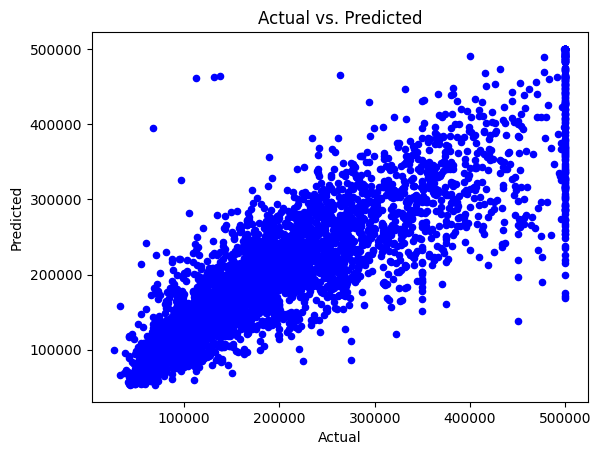

In [51]:
#Write codes to make a scatter plot for both variable 'testing_predictions' and variable 'test_label'
import matplotlib.pyplot as plt
prediction_summary.plot(kind='scatter', x='Actual', y='Predicted', title='Actual vs. Predicted', color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

#### task 2

In [52]:
import numpy as np
np.corrcoef(train_labels, training_predicttions)

array([[1.        , 0.86191378],
       [0.86191378, 1.        ]])

## Question 5
### Step 10e

In [53]:
prediction_summary['error'] = prediction_summary['Actual'] - prediction_summary['Predicted']


In [54]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predicttions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

59804.04517062825

## Question 6
### Step 10f

## task 2

In [55]:
# practice 10f.1: Define one KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=7, metric = 'euclidean') # pick one configuration K=7

In [56]:
## practice 10f.2:  Evaluate the KNN model using cross-validation on the training set
# KNN will take ~3min set using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')
print("CV_mse_scores: ", CV_mse_scores)

CV_mse_scores:  [-3.91841608e+09 -4.10790086e+09 -3.59604082e+09 -3.81505352e+09
 -4.08762578e+09 -3.83463385e+09 -4.10664865e+09 -3.77413013e+09
 -3.73180413e+09 -4.15740833e+09]


#### Task 3

In [57]:
# display CV scores
def display_scores(scores):
    print("CV_scores: ", scores)
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

In [58]:
display_scores(CV_mse_scores)

CV_scores:  [-3.91841608e+09 -4.10790086e+09 -3.59604082e+09 -3.81505352e+09
 -4.08762578e+09 -3.83463385e+09 -4.10664865e+09 -3.77413013e+09
 -3.73180413e+09 -4.15740833e+09]
CV Mean:  -3912966215.784583
CV Standard deviation:  182773010.66517955


#### Task 4

In [59]:
from sklearn.model_selection import cross_val_score
CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print("CV_r2_scores: ", CV_r2_scores)

CV_r2_scores:  [0.69080821 0.70565108 0.71749391 0.69946592 0.69684798 0.71756461
 0.69251691 0.71558565 0.72019134 0.68628121]


## Question 7

In [66]:
def evaluate_knn(k_values):
    results = []
    
    for k in k_values:
        knn_regressor = KNeighborsRegressor(n_neighbors=k)
        knn_regressor.fit(train_features_normalized, train_labels)
        
        # Training MSE
        training_predictions = knn_regressor.predict(train_features_normalized)
        training_mse = mean_squared_error(train_labels, training_predictions)
        
        # Training Correlation
        training_corr = np.corrcoef(train_labels, training_predictions)[0, 1]
        
        # Cross-validation MSE (10-fold CV)
        cv_mse_scores = cross_val_score(knn_regressor, train_features_normalized, train_labels, cv=10, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_mse_scores.mean()
        std_cv_mse = cv_mse_scores.std()
        
        # Cross-validation R² (10-fold CV)
        cv_r2_scores = cross_val_score(knn_regressor, train_features_normalized, train_labels, cv=10, scoring='r2')
        mean_cv_r2 = cv_r2_scores.mean()
        std_cv_r2 = cv_r2_scores.std()
        
        # Append the results for this K value
        results.append({
            'K': k,
            'Training MSE': training_mse,
            'Training Correlation': training_corr,
            'Mean CV MSE': mean_cv_mse,
            'Std CV MSE': std_cv_mse,
            'Mean CV R2': mean_cv_r2,
            'Std CV R2': std_cv_r2
        })
    
    return pd.DataFrame(results)

In [67]:
k_values = [1, 3, 5, 7, 9]
knn_results = evaluate_knn(k_values)

In [68]:
print(knn_results)

   K  Training MSE  Training Correlation   Mean CV MSE    Std CV MSE  \
0  1  0.000000e+00              1.000000  5.785628e+09  2.825489e+08   
1  3  2.017961e+09              0.920965  4.248065e+09  1.789400e+08   
2  5  2.559006e+09              0.898736  4.013255e+09  2.132148e+08   
3  7  2.856855e+09              0.886280  3.912966e+09  1.827730e+08   
4  9  3.027968e+09              0.879043  3.905838e+09  1.614103e+08   

   Mean CV R2  Std CV R2  
0    0.562436   0.023991  
1    0.678839   0.013231  
2    0.696624   0.015209  
3    0.704241   0.012067  
4    0.704746   0.011111  


## Question 8

In [61]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor_k1 = KNeighborsRegressor(n_neighbors=1) # pick one configuration K=1
KNN_regressor_k1.fit(train_features_normalized, train_labels) 

KNeighborsRegressor(n_neighbors=1)

In [62]:
training_predictions_knn_k1 = KNN_regressor_k1.predict(train_features_normalized)
training_predictions_knn_k1

array([145200., 117000., 263900., ..., 241900., 150000., 191100.])

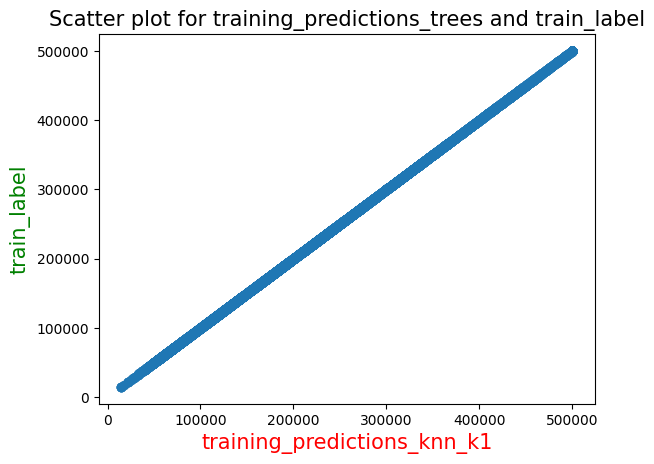

In [63]:
import matplotlib.pyplot as plt
plt.scatter(training_predictions_knn_k1, train_labels )
plt.xlabel('training_predictions_knn_k1', fontsize=15, color="red")
plt.ylabel('train_label', fontsize=15,color="green")
plt.title('Scatter plot for training_predictions_trees and train_label', fontsize=15)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
knn_k1_mse = mean_squared_error(train_labels, training_predictions_knn_k1)
print("Training MSE of model: ",knn_k1_mse)

Training MSE of model:  0.0


## Question 10

In [69]:
# Practice 13.1: define a ML model to finetune the hyper-parameters
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor()
# leave the hyper-parameters empty inside the method classs


In [72]:
# parameter 1: n_neighbors
n_neighbors_list = [1, 3, 5, 7, 9]

In [73]:
# parameter 2: weighting strategies
metrics_list = ["uniform", "distance"]

In [74]:
# Practice 13.2: Define the hyper-parameter combination 
KNN_param_grid = {
'n_neighbors': n_neighbors_list,
'weights': metrics_list
}

In [75]:
# Practice 13.3: define grid_search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNN_regressor, param_grid = KNN_param_grid, cv = 10, scoring = 'r2', return_train_score = True)
## we use 'r2' as evaluation metrics for this example
## check what does return_train_score = True mean

In [76]:
# Practice 13.4: fit grid-searchcv on training data
grid_search.fit(X = train_features_normalized, y = train_labels)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2')

## Question 11

In [77]:
# practice 13c.1: get best parameters
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [78]:
# practice 13c.2: get best estimator
best_knn_model = grid_search.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [79]:
# Create a df from the cv_resutls
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009519,0.000231,0.008628,0.000473,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.519702,0.603715,0.573019,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.009242,0.000225,0.008370,0.000327,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.519702,0.603715,0.573019,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.009432,0.000270,0.011961,0.001824,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.665652,0.689578,0.684602,...,0.845155,0.845877,0.847110,0.845713,0.845675,0.843759,0.845161,0.846836,0.845660,0.001091
3,0.009071,0.000268,0.011555,0.000535,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.669229,0.697347,0.692106,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.009189,0.000249,0.013176,0.000828,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.684007,0.699685,0.705688,...,0.803992,0.804432,0.805589,0.804018,0.805180,0.802353,0.802877,0.806684,0.804357,0.001389


## Question 12

In [80]:
## 1. clean the missing values in test set
test_set_clean = test_set.dropna(subset=["total_bedrooms"])
test_set_clean

## 2. derive test features and test labels. In this case, test labels are only used for evaluation
test_labels = test_set_clean["median_house_value"].copy() # get labels for output label Y
test_features = test_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set


## 4. scale the numeric features in test set. The scaler is derived from Step 10
## important note: do not apply fit function on the test set, using same scalar from training set
test_features_normalized = scaler.transform(test_features)
test_features_normalized

array([[0.52191641, 0.17241379, 0.21568627, ..., 0.02481851, 0.01928268,
        0.32954028],
       [0.20285423, 0.53771552, 0.50980392, ..., 0.11615065, 0.16351716,
        0.23946566],
       [0.6656473 , 0.11961207, 0.21568627, ..., 0.11838431, 0.18800617,
        0.27651343],
       ...,
       [0.19979613, 0.58405172, 0.62745098, ..., 0.08370044, 0.08175858,
        0.23981738],
       [0.61365953, 0.15301724, 0.8627451 , ..., 0.08543774, 0.06980332,
        0.02991683],
       [0.62181448, 0.17780172, 0.76470588, ..., 0.03747596, 0.04261473,
        0.5060344 ]])

In [81]:
### Step 5: make a prediction using the best model from the hyper-parameter tuning
# practice 13c.2: get best estimator
best_knn_model = grid_search.best_estimator_
test_predictions_knn = best_knn_model.predict(test_features_normalized)
test_predictions_knn

array([322741.00801447, 250409.67942524, 191558.03474468, ...,
       260163.42618696, 129864.63337078, 467212.33086968])

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_knn_mse = mean_squared_error(test_labels, test_predictions_knn)
test_knn_correlation = np.corrcoef(test_labels, test_predictions_knn)
test_knn_R2 = r2_score(test_labels, test_predictions_knn)
print("MSE: ", test_knn_mse)
print("Correlation: ", test_knn_correlation)
print("R2-score: ", test_knn_R2)

MSE:  4364782631.990618
Correlation:  [[1.         0.83272273]
 [0.83272273 1.        ]]
R2-score:  0.6803241320815888


In [83]:
from joblib import dump, load

dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [84]:
dump(best_knn_model, 'best_knn_model.joblib') 

['best_knn_model.joblib']

In [85]:
scaler_reload = load('scaler.joblib') 

In [86]:

print("Scaler Min: ",scaler_reload.data_min_)

print("Scaler Max: ",scaler_reload.data_max_)



Scaler Min:  [-124.3      32.56      1.       16.        3.        5.        3.
    0.4999]
Scaler Max:  [-1.14490e+02  4.18400e+01  5.20000e+01  3.79370e+04  5.47100e+03
  1.61220e+04  5.18900e+03  1.50001e+01]


In [87]:
KNN_model_reload = load('best_knn_model.joblib') 

KNN_model_reload

KNeighborsRegressor(n_neighbors=9, weights='distance')